In [53]:
import numpy as np
import pandas as pd
import datetime
import re
import requests
import seaborn as sns
from bs4 import BeautifulSoup
import warnings
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from random_forest import *
from optimize_rfr_hyperparams import *
%matplotlib inline

In [130]:
df1 = pd.read_csv("Chicago-Covid-SocioDemographics-Cases-Deaths.csv")

df2 = pd.read_csv("socio-demographic-and-death-counts.csv")
print(df1.shape)
print(df2.shape)
df = pd.concat([df1, df2])
df = df.drop(['Death Counts', 'Case Counts','Case Counts(Per 1000)'], axis=1)
df

(57, 54)
(994, 54)


,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Bachelor's(%),Post-grad(%),Foriegn Born Population(%),Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts(Per 1000)
0,60647,85658,32.2,17.56,75.14,7.30,49.75,50.25,48.50,4.72,...,35.73,21.65,17.10,14.76,14.11,1.67,0.68,66.31,2.47,2.148077
1,60639,88515,34.6,26.29,62.24,11.47,49.90,50.10,8.07,13.24,...,9.32,4.24,32.87,4.69,2.99,0.61,0.00,91.67,0.03,3.140711
2,60707,42434,40.0,21.06,63.60,15.33,47.33,52.67,46.85,6.63,...,16.73,11.11,26.15,42.45,11.93,0.98,0.00,44.29,0.34,3.063581
3,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,44.90,26.79,13.30,38.17,19.04,1.60,0.50,38.03,2.65,1.680609
4,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.00,53.02,...,8.03,5.19,13.92,1.55,2.46,0.89,0.00,94.89,0.21,2.858085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,54540,880,58.2,11.59,60.34,28.07,52.95,47.05,90.68,0.00,...,20.71,13.17,2.84,68.00,0.00,0.00,0.00,32.00,0.00,1.136364
990,54541,1392,45.1,20.55,58.84,20.62,44.40,55.60,80.10,4.17,...,9.58,6.09,1.22,11.76,88.24,0.00,0.00,0.00,0.00,9.339080
991,54542,500,52.9,13.00,56.20,30.80,50.00,50.00,79.20,0.00,...,10.49,4.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.000000
992,54545,859,61.1,11.06,50.99,37.95,51.11,48.89,92.67,0.00,...,27.17,16.98,0.70,100.00,0.00,0.00,0.00,0.00,0.00,6.984866


In [131]:
df = df.drop(df[df['Death Counts(Per 1000)'] == 0].index)


In [132]:
y = df.pop('Death Counts(Per 1000)')
df.pop('Zipcode')
X = df.to_numpy()

In [174]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
n_trees = range(1,200)
depths = range(1,40)
names = []
errors = []
for n in n_trees:
    r1 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=9), random_state=0,n_estimators=n)
    r1.fit(X_train, y_train)
    error = np.mean(abs(r1.predict(X_test) - y_test))
    names.append(n)
    errors.append(error)
print("Done!")

Done!


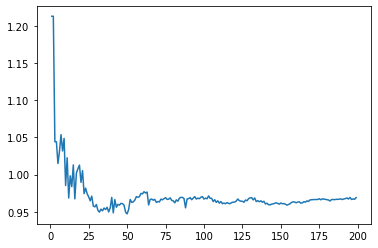

In [175]:
plt.plot(names, errors)
plt.show()

In [176]:
errors.index(min(errors))

49

In [ ]:
r1 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=9), random_state=0,n_estimators=50)
r1.fit(X_train, y_train)
error = np.mean(abs(r1.predict(X_test) - y_test))

In [116]:
from sklearn.model_selection import RepeatedStratifiedKFold
# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [1, 10, 50, 100, 500, 1000, 5000]
    learner = LogisticRegression(random_state=0)
    for n in n_trees:
        models[str(n)] = AdaBoostRegressor(base_estimator=learner, random_state=0, n_estimators=n)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    r2.fit(X_train, y_train)
    error = np.mean(abs(r2.predict(X_test) - y_test))
    return error

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    score = evaluate_model(model, X_train, y_train, X_test, y_test)
    # store the results
    results.append(score)
    names.append(name)
    # summarize the performance along the way
    print(name, score)

1 1.0120348604812284
10 1.0120348604812284
50 1.0120348604812284
100 1.0120348604812284
500 1.0120348604812284
1000 1.0120348604812284
5000 1.0120348604812284


In [2]:
def prepare_data():
    # Newyork:
    # https://raw.githubusercontent.com/nychealth/coronavirus-data/master/totals/data-by-modzcta.csv
    # City of San Antonio:
    # https://cosacovid-cosagis.hub.arcgis.com/datasets/CoSAGIS::covid19-deaths-by-zip-code/about
    # Wisconsin:
    # https://data.dhsgis.wi.gov/datasets/wi-dhs::covid-19-data-by-zip-code-tabulation-area-v2/about
    ny_df = pd.read_csv('Data/Covid Data/newyork-covid19-cases-and-deaths.csv')
    ny_df = ny_df[['MODIFIED_ZCTA', 'COVID_CASE_COUNT', 'COVID_DEATH_COUNT']]
    ny_df.columns = ['Zipcode', 'Case Counts', 'Death Counts']
    display(ny_df)
    sa_df = pd.read_csv('Data/Covid Data/san-antonio-covid19-cases-and-deaths.csv')
    sa_df = sa_df[['ZIP_CODE', 'Positive','Deaths']]
    sa_df.columns = ['Zipcode', 'Case Counts', 'Death Counts']
    display(sa_df)
    wi_df = pd.read_csv('Data/Covid Data/wisconsin-covid19-cases-and-deaths.csv')
    wi_df = wi_df[['GEOID', 'POS_CUM_CP', 'DTH_CUM_CP']]
    wi_df.columns = ['Zipcode', 'Case Counts', 'Death Counts']
    display(wi_df)
    frames = [ny_df, sa_df, wi_df]
    df = pd.concat(frames)
    return df

In [3]:
df = prepare_data()

,Zipcode,Case Counts,Death Counts
0,10001,7745,57
1,10002,19171,412
2,10003,13634,84
3,10004,973,2
4,10005,2323,1
...,...,...,...
172,11691,19207,614
173,11692,5068,154
174,11693,3256,63
175,11694,5783,133


,Zipcode,Case Counts,Death Counts
0,78002,2712,21
1,78015,2407,11
2,78023,5907,41
3,78069,405,8
4,78073,3006,18
...,...,...,...
61,78259,5505,36
62,78260,7417,29
63,78261,5200,14
64,78263,1305,7


,Zipcode,Case Counts,Death Counts
0,54403,6922,90
1,54405,935,24
2,54406,932,7
3,54407,329,1
4,54408,252,3
...,...,...,...
770,54540,186,1
771,54541,391,13
772,54542,82,1
773,54545,165,6


In [4]:
def scrape(z):
        z = str(z)
        source = requests.get('https://censusreporter.org/profiles/86000US{zip}-{zip}/'.format(zip=z)).text
        soup = BeautifulSoup(source, 'lxml')
        s = soup.findAll('script',type="text/javascript")[1]
        return str(s)

def parse(param, sp):
    param = '"'+param+'", '
    try:
        var = float(re.findall(param+'"values": {"this":\s*([+-]?[0-9]+\.[0-9]+)',sp)[0])
    except:
        var = 0

    return var

def getSocioDem(zipcodes):
    df = pd.DataFrame(columns = [ 'Zipcode', 'Population', 'Median age', 'Under 18(%)', '18 to 64(%)', '65 and over(%)', 'Male(%)', 'Female(%)', 'White(%)', "Black(%)", "Native(%)", "Asian(%)", "Islander(%)", "Two plus(%)", "Hispanic(%)", "Per capita income (USD)", "Median household income (USD)", "Below poverty line(%)",
                                'Mean travel time to work (Minutes)', 'Drove Alone (%)', 'Carpooled (%)', 'Public Transit (%)', 'Bicycle (%)', 'Walked (%)', 'Other (%)', 'Worked at home (%)', 'Number of households', 'Persons per household', 'Married (%)', 'Single (%)',
                                'Number of housing units', 'Occupied housing (%)', 'Vacant housing (%)', 'Owner Occupied (%)', 'Renter Occupied (%)', 'Median housing value',
                                'Moved Since Prev Year(%)', 'Same House Prev Year(%)', 'No Degree(%)', 'High School(%)', 'Some College(%)', "Bachelor's(%)", "Post-grad(%)", 'Foriegn Born Population(%)', 'Europe(%)', 'Asia(%)', 'Africa(%)', 'Oceania(%)', 'Latin America(%)', 'North America(%)'],
                                index = list(range(0,len(zipcodes))))

    i = 0
    for zip in zipcodes:
        try:
            s = scrape(zip)
        except:
            continue
        var = '"full_geoid": "86000US{z}", "total_population":'.format(z=str(zip))
        population = int(re.findall(var+'\s*([+-]?[0-9]+)',s)[0])

        median_age = parse("Median age",s)
        percent_under18 = parse("Under 18",s)
        percent_18to64 = parse("18 to 64",s)
        percent_65andOver = parse("65 and over",s)

        percent_male = parse("Male",s)
        percent_female = parse("Female",s)

        percent_white = parse("White",s)
        percent_black = parse("Black",s)
        percent_native = parse("Native",s)
        percent_asian = parse("Asian",s)
        percent_islander = parse("Islander",s)
        pecent_two_plus = parse("Two\+",s)
        percent_hispanic = parse("Hispanic",s)

        per_capita = parse("Per capita income", s)
        median_household_income = parse("Median household income",s)

        percent_below_poverty = parse("Persons below poverty line",s)

        mean_travel_time = parse("Mean travel time to work",s)
        drove_alone = parse("Drove alone",s)
        carpooled = parse("Carpooled",s)
        public_transit = parse("Public transit",s)
        bicycle = parse("Bicycle",s)
        walked = parse("Walked",s)
        other = parse("Other",s)
        worked_at_home = parse("Worked at home",s)

        number_of_households = parse("Number of households",s)
        persons_per_household = parse("Persons per household",s)

        married = parse("Married",s)
        single = parse("Single",s)

        number_of_housing_units = parse("Number of housing units",s)
        occupied_housing_units = parse("Occupied",s)
        vacant_housing_units = parse("Vacant",s)
        owner_housing_units = parse("Owner occupied",s)
        renter_housing_units = parse("Renter occupied",s)

        median_value_owner_occupied = parse("Median value of owner-occupied housing units",s)

        moved_since_previous_year = parse("Moved since previous year",s)
        same_house_year_ago = parse("Same house year ago",s)

        no_degree = parse("No degree",s)
        high_school = parse("High school",s)
        some_college = parse("Some college",s)
        bachelors = parse("Bachelor's",s)
        post_grad = parse("Post-grad",s)

        foriegn_born_pop = parse("Foreign-born population",s)
        europe = parse('Europe',s)
        asia = parse('Asia',s)
        africa = parse('Africa',s)
        oceania = parse('Oceania',s)
        latin_america = parse('Latin America',s)
        north_america = parse('North America',s)

        df.iloc[i] = [zip, population, median_age, percent_under18, percent_18to64, percent_65andOver, percent_male, percent_female, percent_white, percent_black, percent_native, percent_asian, percent_islander, pecent_two_plus, percent_hispanic, per_capita, median_household_income, percent_below_poverty, mean_travel_time,
        drove_alone, carpooled, public_transit, bicycle, walked, other, worked_at_home, number_of_households, persons_per_household, married, single, number_of_housing_units, occupied_housing_units, vacant_housing_units, owner_housing_units, renter_housing_units,
        median_value_owner_occupied, moved_since_previous_year, same_house_year_ago, no_degree, high_school, some_college, bachelors, post_grad, foriegn_born_pop, europe, asia, africa, oceania, latin_america, north_america]

        i+=1
    return df

In [5]:
#crape social demographic data 
zipcodes = df.Zipcode.tolist()
socio_df = getSocioDem(zipcodes)

In [6]:
socio_df['Zipcode'].isnull().sum()
socio_df.iloc[:-2]

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Some College(%),Bachelor's(%),Post-grad(%),Foriegn Born Population(%),Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%)
0,10001,25026,36.1,10.98,76.38,12.64,49.01,50.99,54.51,6.14,...,10.28,43.84,28.37,28.71,19.08,49.55,2.25,3.52,21.46,4.13
1,10002,74363,44.8,13.09,63.18,23.74,49.29,50.71,22.16,7.77,...,12.98,23.86,10.65,41.04,5.55,79.01,0.61,1.27,12.85,0.7
2,10003,54671,31.9,7.18,80.16,12.66,48.78,51.22,67.98,5.01,...,9.23,45.16,36.0,18.84,30.11,41.21,1.84,6.09,15.72,5.03
3,10004,3310,38.4,7.37,84.23,8.4,47.34,52.66,66.89,4.5,...,3.48,45.67,48.33,20.36,27.89,53.26,2.97,7.42,2.08,6.38
4,10005,8664,30.4,10.2,88.73,1.06,47.68,52.32,70.16,2.01,...,1.6,51.52,40.15,17.68,36.36,41.91,0.72,9.01,8.49,3.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,54539,1261,57.9,11.26,51.39,37.35,48.77,51.23,93.66,1.82,...,39.72,15.78,12.11,0.32,100.0,0,0,0,0,0
1012,54540,880,58.2,11.59,60.34,28.07,52.95,47.05,90.68,0,...,37.45,20.71,13.17,2.84,68.0,0,0,0,32.0,0
1013,54541,1392,45.1,20.55,58.84,20.62,44.4,55.6,80.1,4.17,...,29.82,9.58,6.09,1.22,11.76,88.24,0,0,0,0
1014,54542,500,52.9,13.0,56.2,30.8,50.0,50.0,79.2,0,...,32.74,10.49,4.86,0,0,0,0,0,0,0


In [7]:
merge_df = pd.merge(socio_df, df, how='inner', on='Zipcode')
zero_rows = merge_df[merge_df['Population'] == 0].index.tolist()
merge_df = merge_df.drop(zero_rows)
merge_df['Death Counts(Per 1000)'] = (merge_df['Death Counts'] / merge_df['Population']) * 1000
merge_df['Case Counts(Per 1000)'] = (merge_df['Case Counts'] / merge_df['Population']) * 1000
merge_df

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Case Counts,Death Counts,Death Counts(Per 1000),Case Counts(Per 1000)
0,10001,25026,36.1,10.98,76.38,12.64,49.01,50.99,54.51,6.14,...,19.08,49.55,2.25,3.52,21.46,4.13,7745,57,2.277631,309.478143
1,10002,74363,44.8,13.09,63.18,23.74,49.29,50.71,22.16,7.77,...,5.55,79.01,0.61,1.27,12.85,0.7,19171,412,5.54039,257.80294
2,10003,54671,31.9,7.18,80.16,12.66,48.78,51.22,67.98,5.01,...,30.11,41.21,1.84,6.09,15.72,5.03,13634,84,1.536464,249.382671
3,10004,3310,38.4,7.37,84.23,8.4,47.34,52.66,66.89,4.5,...,27.89,53.26,2.97,7.42,2.08,6.38,973,2,0.60423,293.957704
4,10005,8664,30.4,10.2,88.73,1.06,47.68,52.32,70.16,2.01,...,36.36,41.91,0.72,9.01,8.49,3.52,2323,1,0.11542,268.12096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,54540,880,58.2,11.59,60.34,28.07,52.95,47.05,90.68,0,...,68.0,0,0,0,32.0,0,186,1,1.136364,211.363636
1013,54541,1392,45.1,20.55,58.84,20.62,44.4,55.6,80.1,4.17,...,11.76,88.24,0,0,0,0,391,13,9.33908,280.890805
1014,54542,500,52.9,13.0,56.2,30.8,50.0,50.0,79.2,0,...,0,0,0,0,0,0,82,1,2.0,164.0
1015,54545,859,61.1,11.06,50.99,37.95,51.11,48.89,92.67,0,...,100.0,0,0,0,0,0,165,6,6.984866,192.083818


In [17]:
import wrangle2
df = wrangle2.get_data()
df

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Case Counts,Death Counts,Death Counts(Per 1000),Case Counts(Per 1000)
0,10001,25026,36.1,10.98,76.38,12.64,49.01,50.99,54.51,6.14,...,19.08,49.55,2.25,3.52,21.46,4.13,7745,57,2.277631,309.478143
1,10002,74363,44.8,13.09,63.18,23.74,49.29,50.71,22.16,7.77,...,5.55,79.01,0.61,1.27,12.85,0.7,19171,412,5.54039,257.80294
2,10003,54671,31.9,7.18,80.16,12.66,48.78,51.22,67.98,5.01,...,30.11,41.21,1.84,6.09,15.72,5.03,13634,84,1.536464,249.382671
3,10004,3310,38.4,7.37,84.23,8.4,47.34,52.66,66.89,4.5,...,27.89,53.26,2.97,7.42,2.08,6.38,973,2,0.60423,293.957704
4,10005,8664,30.4,10.2,88.73,1.06,47.68,52.32,70.16,2.01,...,36.36,41.91,0.72,9.01,8.49,3.52,2323,1,0.11542,268.12096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,54540,880,58.2,11.59,60.34,28.07,52.95,47.05,90.68,0,...,68.0,0,0,0,32.0,0,186,1,1.136364,211.363636
1013,54541,1392,45.1,20.55,58.84,20.62,44.4,55.6,80.1,4.17,...,11.76,88.24,0,0,0,0,391,13,9.33908,280.890805
1014,54542,500,52.9,13.0,56.2,30.8,50.0,50.0,79.2,0,...,0,0,0,0,0,0,82,1,2.0,164.0
1015,54545,859,61.1,11.06,50.99,37.95,51.11,48.89,92.67,0,...,100.0,0,0,0,0,0,165,6,6.984866,192.083818


In [19]:
df = pd.read_csv('socio-demographic-and-death-counts.csv')
print(df.columns)
df = df.drop(df[df['Median household income (USD)'] == 0].index.tolist())
df[df['Median household income (USD)'] == 0]

Index(['Unnamed: 0', 'Zipcode', 'Population', 'Median age', 'Under 18(%)',
       '18 to 64(%)', '65 and over(%)', 'Male(%)', 'Female(%)', 'White(%)',
       'Black(%)', 'Native(%)', 'Asian(%)', 'Islander(%)', 'Two plus(%)',
       'Hispanic(%)', 'Per capita income (USD)',
       'Median household income (USD)', 'Below poverty line(%)',
       'Mean travel time to work (Minutes)', 'Drove Alone (%)',
       'Carpooled (%)', 'Public Transit (%)', 'Bicycle (%)', 'Walked (%)',
       'Other (%)', 'Worked at home (%)', 'Number of households',
       'Persons per household', 'Married (%)', 'Single (%)',
       'Number of housing units', 'Occupied housing (%)', 'Vacant housing (%)',
       'Owner Occupied (%)', 'Renter Occupied (%)', 'Median housing value',
       'Moved Since Prev Year(%)', 'Same House Prev Year(%)', 'No Degree(%)',
       'High School(%)', 'Some College(%)', 'Bachelor's(%)', 'Post-grad(%)',
       'Foriegn Born Population(%)', 'Europe(%)', 'Asia(%)', 'Africa(%)',
       'Oc

,Unnamed: 0,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Case Counts,Death Counts,Death Counts(Per 1000),Case Counts(Per 1000)


In [43]:
df = pd.read_csv('socio-demographic-and-death-counts.csv')
df = df.drop(['Unnamed: 0'], axis=1)
display(df)
df.to_csv('socio-demographic-and-death-counts.csv',index=False)
df = pd.read_csv('socio-demographic-and-death-counts.csv')
df

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Case Counts,Death Counts,Death Counts(Per 1000),Case Counts(Per 1000)
0,10001,25026,36.1,10.98,76.38,12.64,49.01,50.99,54.51,6.14,...,19.08,49.55,2.25,3.52,21.46,4.13,7745,57,2.277631,309.478143
1,10002,74363,44.8,13.09,63.18,23.74,49.29,50.71,22.16,7.77,...,5.55,79.01,0.61,1.27,12.85,0.70,19171,412,5.540390,257.802940
2,10003,54671,31.9,7.18,80.16,12.66,48.78,51.22,67.98,5.01,...,30.11,41.21,1.84,6.09,15.72,5.03,13634,84,1.536464,249.382671
3,10004,3310,38.4,7.37,84.23,8.40,47.34,52.66,66.89,4.50,...,27.89,53.26,2.97,7.42,2.08,6.38,973,2,0.604230,293.957704
4,10005,8664,30.4,10.20,88.73,1.06,47.68,52.32,70.16,2.01,...,36.36,41.91,0.72,9.01,8.49,3.52,2323,1,0.115420,268.120960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,54540,880,58.2,11.59,60.34,28.07,52.95,47.05,90.68,0.00,...,68.00,0.00,0.00,0.00,32.00,0.00,186,1,1.136364,211.363636
990,54541,1392,45.1,20.55,58.84,20.62,44.40,55.60,80.10,4.17,...,11.76,88.24,0.00,0.00,0.00,0.00,391,13,9.339080,280.890805
991,54542,500,52.9,13.00,56.20,30.80,50.00,50.00,79.20,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,82,1,2.000000,164.000000
992,54545,859,61.1,11.06,50.99,37.95,51.11,48.89,92.67,0.00,...,100.00,0.00,0.00,0.00,0.00,0.00,165,6,6.984866,192.083818


,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Case Counts,Death Counts,Death Counts(Per 1000),Case Counts(Per 1000)
0,10001,25026,36.1,10.98,76.38,12.64,49.01,50.99,54.51,6.14,...,19.08,49.55,2.25,3.52,21.46,4.13,7745,57,2.277631,309.478143
1,10002,74363,44.8,13.09,63.18,23.74,49.29,50.71,22.16,7.77,...,5.55,79.01,0.61,1.27,12.85,0.70,19171,412,5.540390,257.802940
2,10003,54671,31.9,7.18,80.16,12.66,48.78,51.22,67.98,5.01,...,30.11,41.21,1.84,6.09,15.72,5.03,13634,84,1.536464,249.382671
3,10004,3310,38.4,7.37,84.23,8.40,47.34,52.66,66.89,4.50,...,27.89,53.26,2.97,7.42,2.08,6.38,973,2,0.604230,293.957704
4,10005,8664,30.4,10.20,88.73,1.06,47.68,52.32,70.16,2.01,...,36.36,41.91,0.72,9.01,8.49,3.52,2323,1,0.115420,268.120960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,54540,880,58.2,11.59,60.34,28.07,52.95,47.05,90.68,0.00,...,68.00,0.00,0.00,0.00,32.00,0.00,186,1,1.136364,211.363636
990,54541,1392,45.1,20.55,58.84,20.62,44.40,55.60,80.10,4.17,...,11.76,88.24,0.00,0.00,0.00,0.00,391,13,9.339080,280.890805
991,54542,500,52.9,13.00,56.20,30.80,50.00,50.00,79.20,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,82,1,2.000000,164.000000
992,54545,859,61.1,11.06,50.99,37.95,51.11,48.89,92.67,0.00,...,100.00,0.00,0.00,0.00,0.00,0.00,165,6,6.984866,192.083818


In [71]:
df = pd.read_csv('socio-demographic-and-death-counts.csv')
death = df['Death Counts']
case = df['Case Counts']
death1000 = df['Death Counts(Per 1000)']
case1000 = df['Case Counts(Per 1000)']
df = df.drop(['Death Counts', 'Case Counts','Death Counts(Per 1000)','Case Counts(Per 1000)'],axis=1)
df['Death Counts'] = death
df['Death Counts(Per 1000)'] = death1000
df['Case Counts'] = case
df['Case Counts(Per 1000)'] = case1000
df.to_csv('socio-demographic-and-death-counts.csv',index=False)

In [76]:
df.isnull().sum().sum()

0

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame
from mpl_toolkits.axes_grid1 import make_axes_locatable
import wrangle

In [17]:
obj = wrangle.Wrangle()
caseCountByDate = obj.rawCovidCaseData()
deathCountByDate = obj.wrangleCovidDeathData()
zipcodes = obj.zipcodes
mergedSocCovid = pd.read_csv("Chicago-Covid-SocioDemographics-Cases-Deaths.csv")
gdf = gpd.read_file("Data/Boundaries - ZIP Codes.geojson")

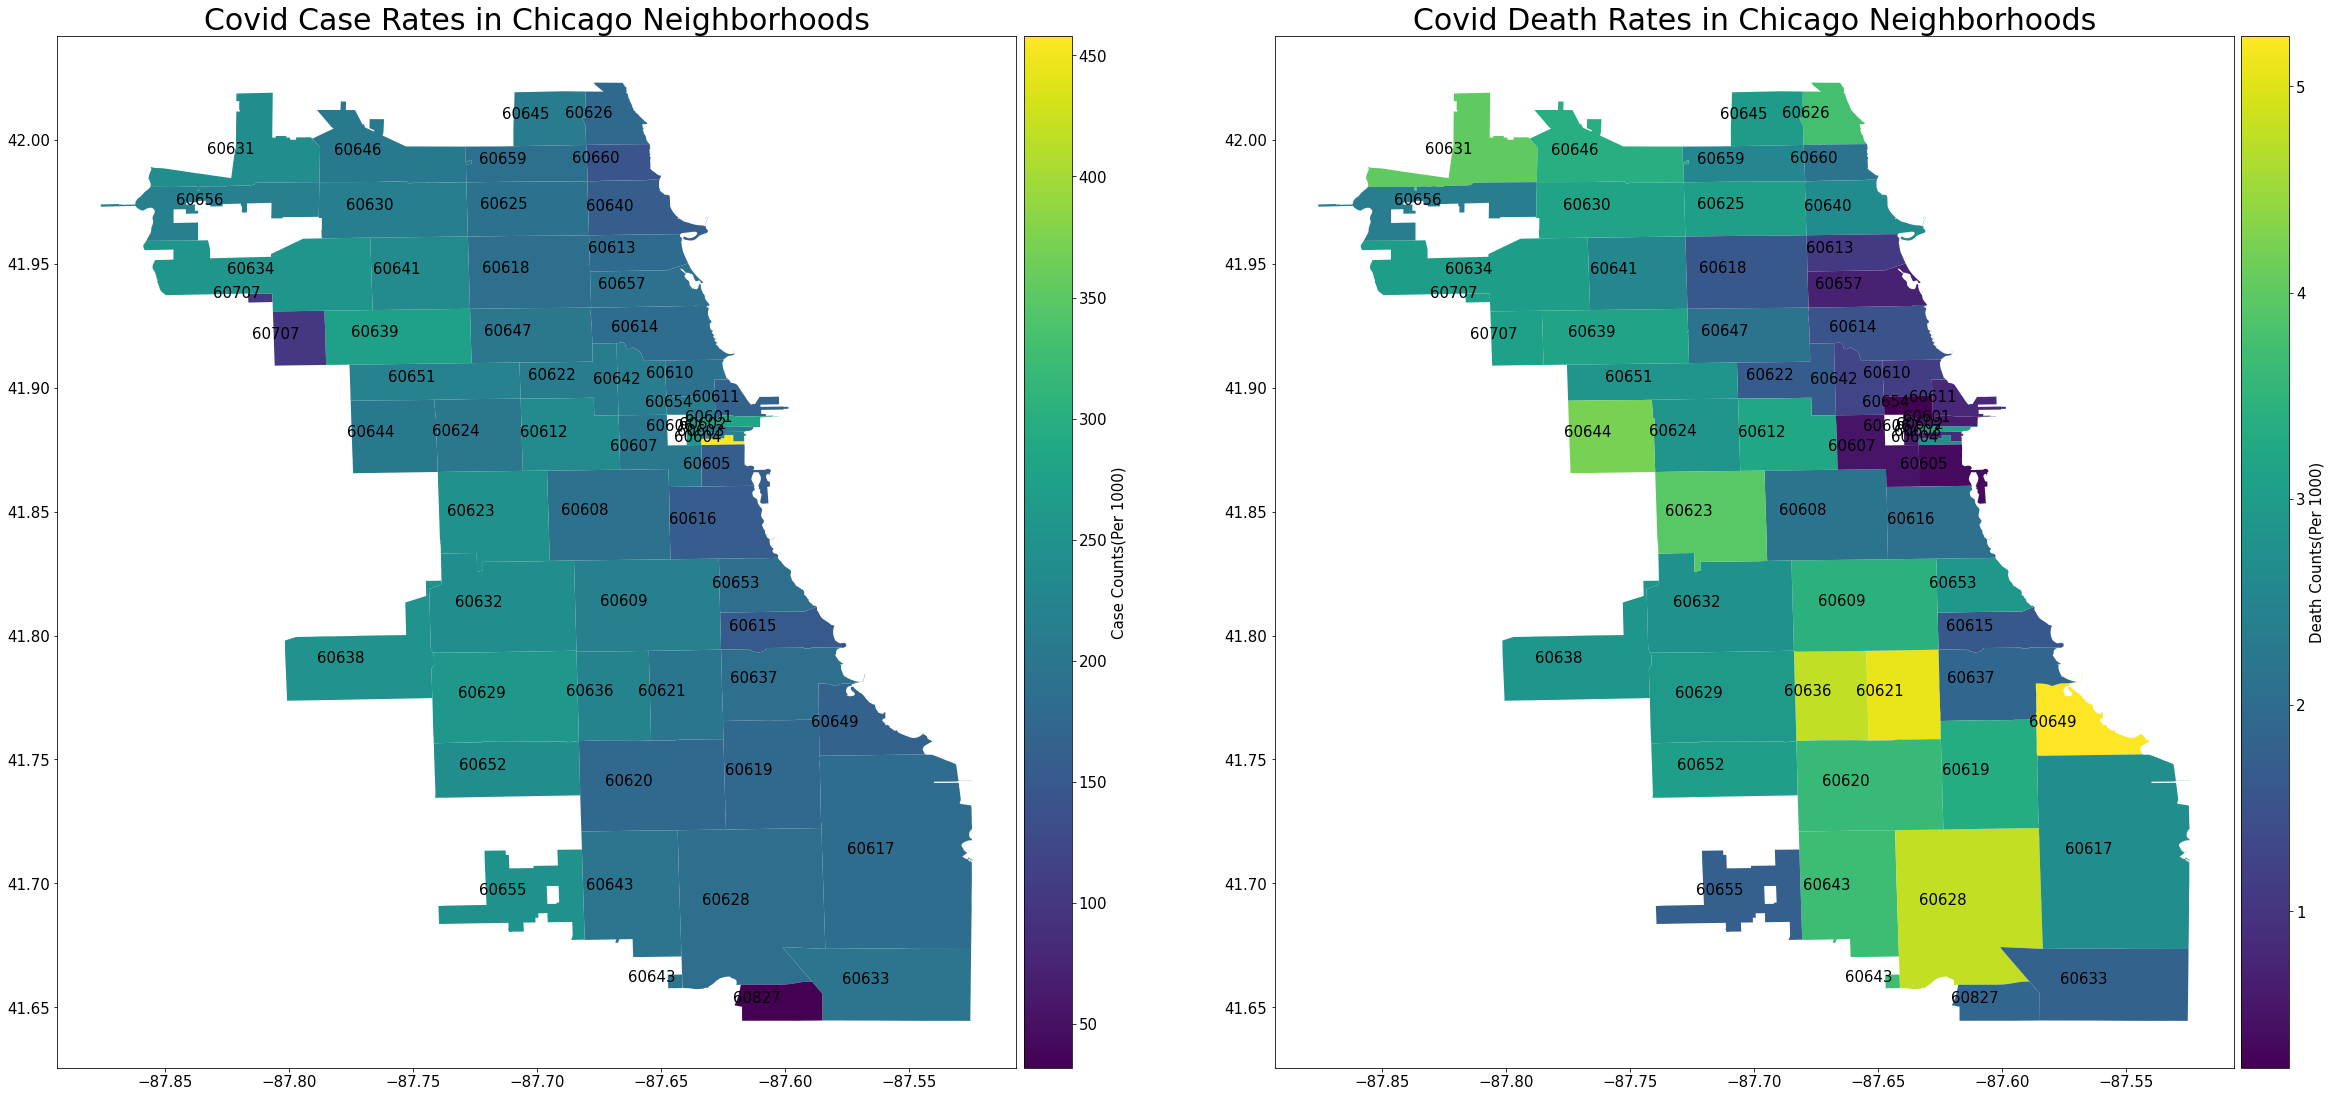

In [55]:
def geographicPlot(gdf, mergedSocCovid):
        gdf = gdf.rename(columns={"zip": "Zipcode"})
        gdf['Zipcode'] = gdf['Zipcode'].astype(str).astype(int)
        df = pd.merge(mergedSocCovid, gdf, how='inner', on = 'Zipcode')
        gdf = gpd.GeoDataFrame(df)
        fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(40,40))
        ax1.set_title('Covid Case Rates in Chicago Neighborhoods', fontsize=30)
        divider = make_axes_locatable(ax1)
        cax1 = divider.append_axes("right", size="5%", pad=0.1)
        plt.rcParams.update({'font.size': 15})
        gdf.apply(lambda x: ax1.annotate(text=x['Zipcode'], color='black', xy=x.geometry.centroid.coords[0], ha='right'), axis=1)
        ax = gdf.plot(column = 'Case Counts(Per 1000)', ax=ax1, legend=True, cax=cax1, legend_kwds={'label': 'Case Counts(Per 1000)'});
        
        ax2.set_title('Covid Death Rates in Chicago Neighborhoods', fontsize=30)
        divider = make_axes_locatable(ax2)
        cax2 = divider.append_axes("right", size="5%", pad=0.1)
        plt.rcParams.update({'font.size': 15})
        gdf.apply(lambda x: ax2.annotate(text=x['Zipcode'], color='black', xy=x.geometry.centroid.coords[0], ha='right'), axis=1)
        ax = gdf.plot(column = 'Death Counts(Per 1000)', ax=ax2, legend=True, cax=cax2, legend_kwds={'label': 'Death Counts(Per 1000)'});
geographicPlot(gdf, mergedSocCovid)

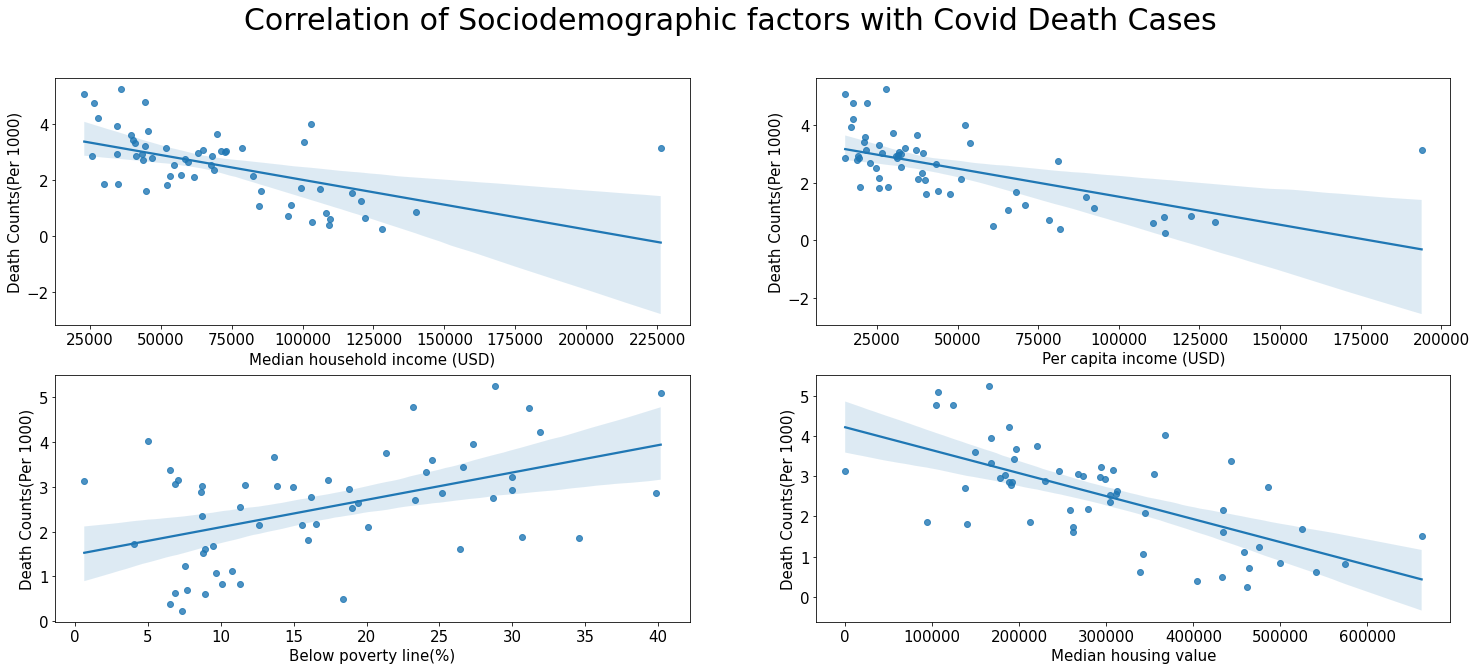

In [57]:
def scatterPlot(mergedSocCovid):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(25,10))
    fig.suptitle('Correlation of Sociodemographic factors with Covid Death Cases',fontsize=30)

    sns.regplot(ax=ax1, data=mergedSocCovid, x="Median household income (USD)", y="Death Counts(Per 1000)")
    sns.regplot(ax=ax2, data=mergedSocCovid, x="Per capita income (USD)", y="Death Counts(Per 1000)")
    sns.regplot(ax=ax3, data=mergedSocCovid, x="Below poverty line(%)", y="Death Counts(Per 1000)")
    sns.regplot(ax=ax4, data=mergedSocCovid, x="Median housing value", y="Death Counts(Per 1000)")
scatterPlot(mergedSocCovid)

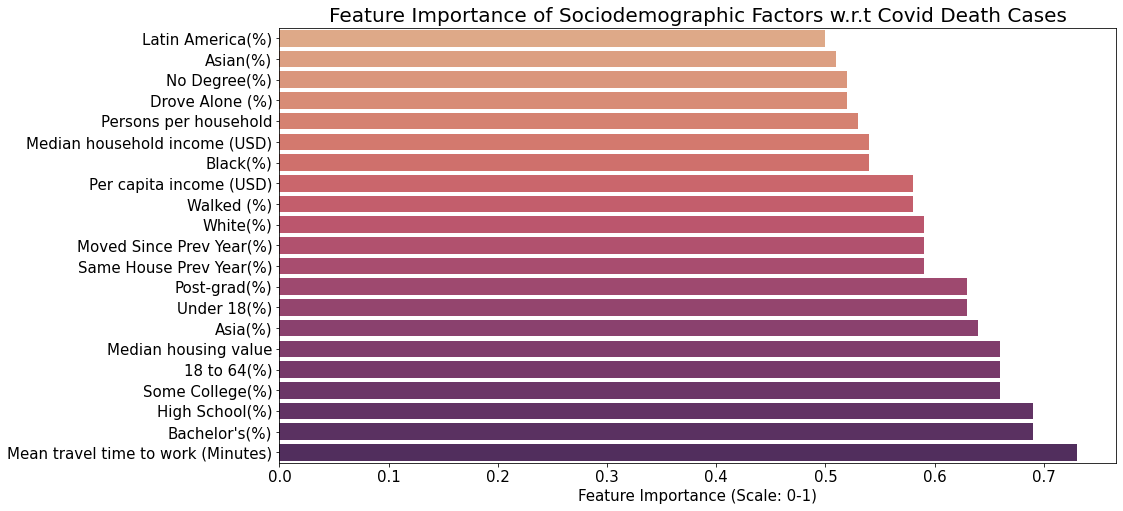

In [60]:
def featureImportance(mergedSocCovid):
    cormat = mergedSocCovid.corr().abs()
    cormat = cormat[cormat>0.5]
    feature_importance = round(cormat,2).dropna(subset=['Death Counts(Per 1000)'])['Death Counts(Per 1000)'].to_frame().reset_index()
    feature_importance = feature_importance[:-2]
    feature_importance = feature_importance.sort_values(by='Death Counts(Per 1000)')
    plt.figure(figsize=(15,8))
    ax = sns.barplot(data=feature_importance, y='index', x='Death Counts(Per 1000)', palette='flare')
    plt.xlabel('Feature Importance (Scale: 0-1)')
    plt.ylabel('')
    plt.title('Feature Importance of Sociodemographic Factors w.r.t Covid Death Cases',fontsize=20)
featureImportance(mergedSocCovid)